In [95]:
import sim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pretty_plots

In [96]:
def get_diffs(n,n_vecs=100,ray_steps=25,a=1):

    df = sim.halos.Sample.Plummer(n,a=a)
    vecs = sim.utils.random_vectors(n_vecs)
    rays = []
    for vec in vecs:
        rays.append(sim.utils.ray(vec,a*2,ray_steps))
    ray = pd.concat(rays)

    analytics = sim.halos.Analytic.Plummer(ray)
    xs = sim.utils.points2radius(ray)

    outf2,timef2 = sim.static_solver.evaluate(ray,df,precision="f2-smcuda")
    outf4,timef4 = sim.static_solver.evaluate(ray,df,precision="f4")
    outf8,timef8 = sim.static_solver.evaluate(ray,df,precision="f8")

    diff_f2 = outf2 - analytics
    diff_f4 = outf4 - analytics
    diff_f8 = outf8 - analytics
    return diff_f2,diff_f4,diff_f8

In [97]:
runs = {}
ns = [1000,10000,100000]
for n in tqdm(ns):
    f2s = []
    f4s = []
    f8s = []
    for i in range(3):
        f2_,f4_,f8_ = get_diffs(n)
        f2s.append(f2_)
        f4s.append(f4_)
        f8s.append(f8_)
    
    f2 = np.concatenate(f2s)
    f4 = np.concatenate(f4s)
    f8 = np.concatenate(f8s)
    
    runs[n] = {"f2":f2,"f4":f4,"f8":f8}

100%|██████████| 3/3 [00:05<00:00,  1.99s/it]


In [98]:
print(runs[1000]["f4"])

[ 0.01387888  0.01809719  0.0195865  ...  0.00044934 -0.00081311
 -0.00168031]


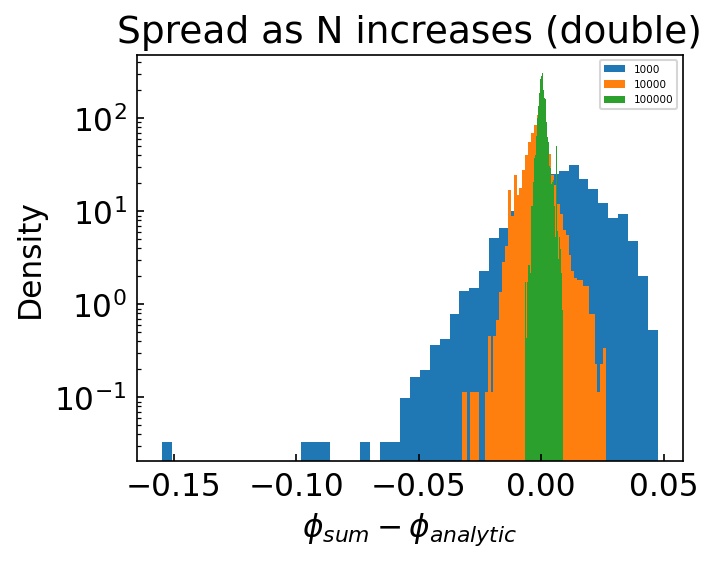

In [104]:
pretty_plots.plot_pretty()
for n in ns:
    plt.hist(runs[n]["f8"],bins=50,density=True,label=n)
plt.yscale('log')
plt.legend()
plt.xlabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.ylabel("Density")
plt.title("Spread as N increases (double)")
plt.tight_layout()
plt.savefig("plots/plummer/float8_spread.jpg")
plt.show()

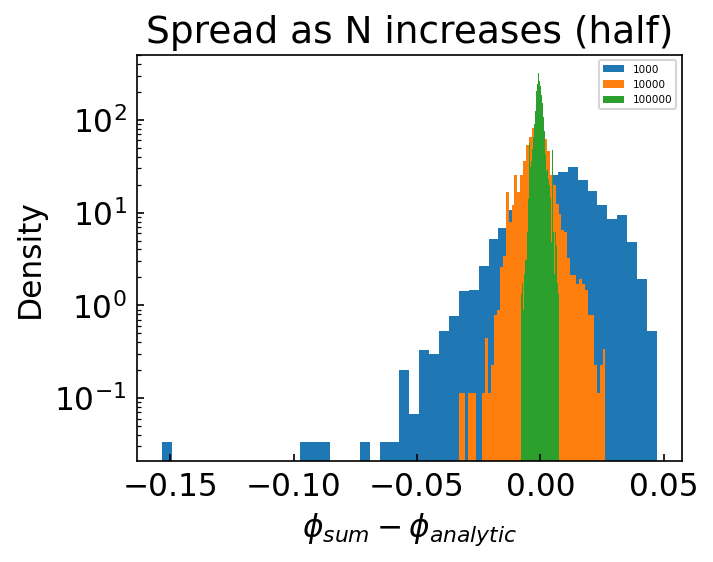

In [102]:
pretty_plots.plot_pretty()
for n in ns:
    plt.hist(runs[n]["f2"],bins=50,density=True,label=n)
plt.yscale('log')
plt.legend()
plt.xlabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.ylabel("Density")
plt.title("Spread as N increases (half)")
plt.tight_layout()
plt.savefig("plots/plummer/float2_spread.jpg")
plt.show()

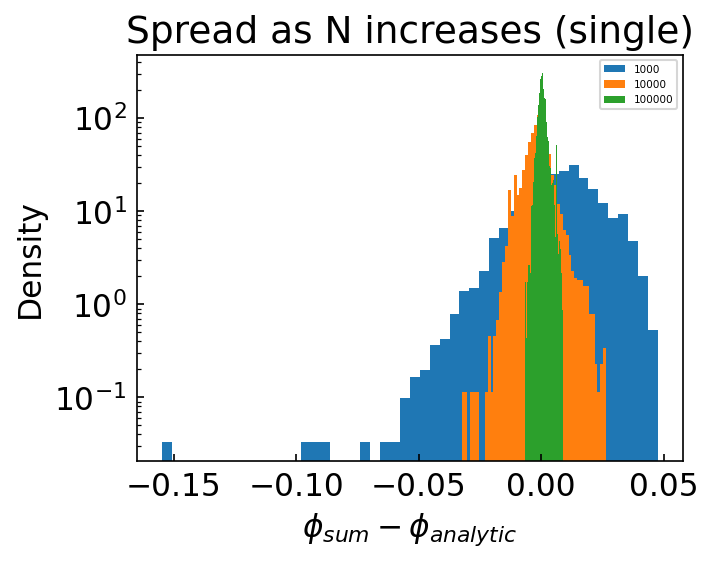

In [108]:
pretty_plots.plot_pretty()
for n in ns:
    plt.hist(runs[n]["f4"],bins=50,density=True,label=n)
plt.yscale('log')
plt.legend()
plt.xlabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.ylabel("Density")
plt.title("Spread as N increases (single)")
plt.tight_layout()
plt.savefig("plots/plummer/float4_spread.jpg")
plt.show()

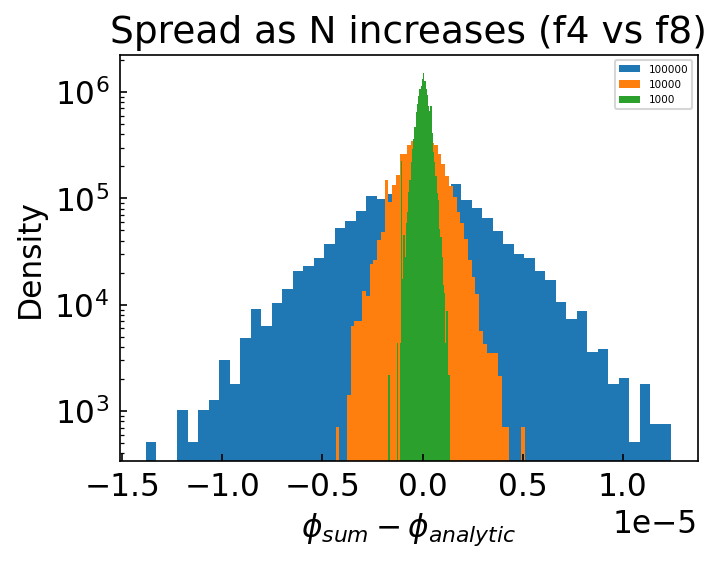

In [117]:
pretty_plots.plot_pretty()
for n in ns[::-1]:
    plt.hist(runs[n]["f8"] - runs[n]["f4"],bins=50,density=True,label=n)
plt.yscale('log')
plt.legend()
plt.xlabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.ylabel("Density")
plt.title("Spread as N increases (f4 vs f8)")
plt.tight_layout()
plt.savefig("plots/plummer/float4_vs_float8.jpg")
plt.show()

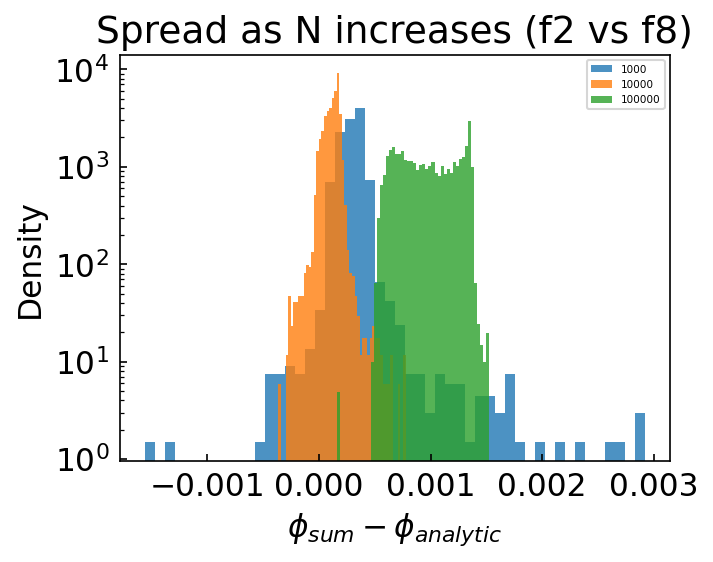

In [116]:
pretty_plots.plot_pretty()
for n in ns:
    plt.hist(runs[n]["f8"] - runs[n]["f2"],bins=50,density=True,label=n,alpha=0.8)
plt.yscale('log')
plt.legend()
plt.xlabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.ylabel("Density")
plt.title("Spread as N increases (f2 vs f8)")
plt.tight_layout()
plt.savefig("plots/plummer/float2_vs_float8.jpg")
plt.show()